In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
images_1 = pd.read_csv("./train.csv")
images_2 = pd.read_csv("./test.csv")

images_1.pop("label");

images_1 = images_1.values / 255
images_2 = images_2.values / 255

In [4]:
images = np.concatenate([images_1,images_2])
del images_1,images_2

### Dense Auto Encoder

In [5]:
input_image = tf.keras.layers.Input(shape=(784,))
encode = tf.keras.layers.Dense(128,activation="relu")(input_image)
encode = tf.keras.layers.Dense(128,activation="relu")(encode)
encode = tf.keras.layers.Dense(256,activation="relu")(encode)
encode = tf.keras.layers.Dense(64,activation="sigmoid")(encode)

neck = tf.keras.layers.Dense(32,activation="relu")(encode)

decode = tf.keras.layers.Dense(64,activation="sigmoid")(neck)
decode = tf.keras.layers.Dense(128,activation="relu")(decode)
decode = tf.keras.layers.Dense(128,activation="relu")(decode)
decode = tf.keras.layers.Dense(784,activation="sigmoid")(decode)

autoencode = tf.keras.models.Model(input_image,decode)
encoder = tf.keras.models.Model(input_image,neck)

In [7]:
autoencode.load_weights("weights/models/dense_autoencoder/dense_autoencoder")

In [154]:
autoencode.compile(optimizer="adam",loss='mae')

In [155]:
autoencode.fit(images,images,batch_size=150,epochs=50)

Train on 70000 samples
Epoch 1/50
70000/70000 [==============================] - 3s 37us/sample - loss: 0.1367
Epoch 2/50
70000/70000 [==============================] - 2s 29us/sample - loss: 0.1198
Epoch 3/50
70000/70000 [==============================] - 2s 29us/sample - loss: 0.1058
Epoch 4/50
70000/70000 [==============================] - 2s 29us/sample - loss: 0.0947
Epoch 5/50
70000/70000 [==============================] - 2s 29us/sample - loss: 0.0874
Epoch 6/50
70000/70000 [==============================] - 2s 29us/sample - loss: 0.0829
Epoch 7/50
70000/70000 [==============================] - 2s 29us/sample - loss: 0.0781
Epoch 8/50
70000/70000 [==============================] - 2s 28us/sample - loss: 0.0709
Epoch 9/50
70000/70000 [==============================] - 2s 27us/sample - loss: 0.0672
Epoch 10/50
70000/70000 [==============================] - 2s 28us/sample - loss: 0.0650
Epoch 11/50
70000/70000 [==============================] - 2s 28us/sample - loss: 0.0630
Epoch 1

(-0.5, 27.5, 27.5, -0.5)

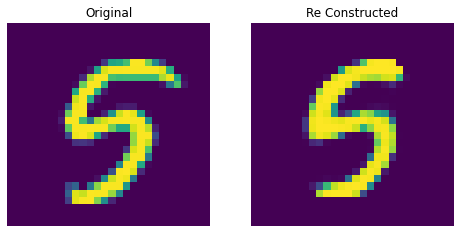

In [12]:
i = 8

img = images[i:i+1]
fig,axes = plt.subplots(1,2,figsize=(8,4))

axes[0].imshow(img.reshape(28,28))
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(autoencode.predict(img).reshape(28,28))
axes[1].set_title("Re Constructed")
axes[1].axis("off")

In [157]:
encoder.predict(img)

array([[0.       , 0.       , 3.3480325, 2.0992312, 0.       , 1.0442941,
        2.5370536, 2.6857421, 1.2939036, 0.6600441, 1.2663218, 2.5296257,
        2.032893 , 1.499196 , 0.       , 1.6799028, 2.9169445, 0.9479513,
        1.6226444, 1.5662105, 2.6184146, 2.513892 , 2.1914182, 0.       ,
        1.1831197, 2.8146615, 1.3453965, 0.572149 , 2.3378417, 2.5802386,
        2.3631284, 0.5554152]], dtype=float32)

In [167]:
autoencode.save_weights("weights/models/dense_autoencoder/dense_autoencoder")
encoder.save_weights("weights/models/dense_autoencoder/dense_encoder")